# Signal synthesis using IDFT

__Desired Learning Outcomes__:
* Experiencing the connection between the DFT sequence and the composition of a signal.
* How to add, subtract and adjust individual constituent sinusoids in a signal using IDFT.

__Libraries and notebook-config:__

In [34]:
from numpy import sin, cos, pi, exp, mean, absolute, angle, conj # Sentrale matematiske funksjoner
from numpy.fft import fft, ifft             # DFT og IDFT
import numpy as np                          # Importer funksjonalitet fra numpy biblioteket med prefiks "np"
import matplotlib.pyplot as plt             # Importer pyplot modulen i matplotlib med prefiks "plt"

%matplotlib ipympl

**Introduction:**

Fourier transformation can be used for more than just identifying frequency components in a signal. A DFT is a *complete* decomposition of a signal, meaning that it contains all the information necessary to reconstruct a signal from its frequency components.

In this task, we will construct a signal by adding and modifying the components in the frequency domain, and then calculate a signal in the time domain using the IDFT. Below is an example that shows the mathematics behind signal generation using IDFT. The signal generated is 64 samples of a sinusoidal sequence given by the formula $ x[n] = 2\cdot \cos\left(2\pi \frac{4}{64}\cdot n - \frac{\pi}{3} \right), \ \ \ 0 \leq n < 64 $.

* Determine which indices in the DFT sequence correspond to a sinusoidal signal with normalized angular frequency $ \hat{\omega} = 2\pi \frac{4}{64} $:
$$\pm \hat{\omega}_k = \pm 2\pi \cdot \frac{4}{64} = \pm 2\pi \cdot \frac{k}{N}, \ \ \ N = 64$$
$$k = \pm 4 $$
$$ \downarrow$$
$$\text{(negative numbers 'roll over' and count down from the highest index.) }$$
$$ \downarrow$$
$$ k = \pm 4 \% 64$$
 
$$
k =
\begin{cases}
\begin{align}
4\ \ \ & \text{(positive frequency component)} \\
-4 \% 64 = 64 - 4 = 60\ \ \ & \text{(negative frequency component)}
\end{align}
\end{cases}
$$
 

* Find the complex amplitude $ a_k $ so that the signal can be written as $ x[n] = a_k \cdot e^{j\hat{\omega}_k\cdot n} + a_k^{*} \cdot e^{-j\hat{\omega}_k\cdot n} $:
$$2\cdot \cos \left(2\pi \frac{4}{64}\cdot n - \frac{\pi}{3} \right) = e^{-j\frac{\pi}{3}}\cdot e^{j2\pi \frac{4}{64}\cdot n} + e^{j\frac{\pi}{3}}\cdot e^{-j2\pi \frac{4}{64}\cdot n}$$
$$a_4 = e^{-j\frac{\pi}{3}}$$
 
 
* Set the relevant elements in \( X[k] \) to the correct value *(here we need to multiply by the number of samples in the DFT sequence)*
$$
X[k] = 
\begin{cases}
\begin{align}
N \cdot a_4= 64 \cdot e^{-j\frac{\pi}{3}},\ \ \  & k = 4 \\
N \cdot a_4^{*} = 64\cdot e^{j\frac{\pi}{3}},\ \ \  & k = 60 \\
0 \ \ \ & otherwise
\end{align}
\end{cases}
$$
 
 
* The inverse DFT gives the desired signal:
$$x[n] = IDFT(X[k])$$


The code cell below performs the last two steps in this process. The parameters `k`, `A`, and `phi` are arrays, allowing us to build a signal with one or more sinusoidal sequences. For now, the code will only generate the signal from the above calculation.

*Note: Take note that we only need to specify the positive frequency components. Code to compute the complex conjugate "mirror image" that contains the negative frequency components is already included.*

<!--
Original norsk tekst:

**Introduction**
The fourier transfomr can be used for more than


Fouriertransformasjon kan brukes til mer enn å identifisere frekvenskomponenter i et signal. En DFT er en *fullstendig* dekomposisjon av et signal, som betyr at den inneholder all informasjon som er nødvendig for å rekonstruere et signal fra frekvenskomponentene. 

I denne oppgaven skal vi konstruere signal ved å legge til og modifisere komponentene i frekvensplanet, for så å regne oss frem til et signal i tidsdomenet med bruk av IDFT. Nedenfor føgler et eksempel som viser matematikken rundt signalgenerasjon med IDFT. Signalet som genereres er 64 sampler av en sinussekvens gitt ved formelen $x[n] = 2\cdot \cos\left(2\pi \frac{4}{64}\cdot n - \frac{\pi}{3} \right), \ \ \ 0 \leq n < 64$.
* Finn ut hvilkde indekser i DFT-sekvensen som vil korrespondere med et sinussignal med normalisert vinkelfrekvens $\hat{\omega} = 2\pi \frac{4}{64}$:
$$\pm \hat{\omega}_k = \pm 2\pi \cdot \frac{4}{64} = \pm 2\pi \cdot \frac{k}{N}, \ \ \ N = 64$$
$$k = \pm 4 $$ 
$$ \downarrow$$
$$\text{(negative tall 'ruller over' og teller ned fra høyeste indeks.) }$$
$$ \downarrow$$
$$ k = \pm 4 \% 64$$
 
$$
k =
\begin{cases}
\begin{align}
4\ \ \ & \text{(positiv frekvenskomponent)} \\
-4 \% 64 = 64 - 4 = 60\ \ \ & \text{(negativ frekvenskomponent)}
\end{align}
\end{cases}
$$
 

* Finn den komplekse amplituden $a_k$ slik at signalet kan skrives som $x[n] = a_k \cdot e^{j\hat{\omega}_k\cdot n} + a_k^{*} \cdot e^{-j\hat{\omega}_k\cdot n}$:
$$2\cdot \cos \left(2\pi \frac{4}{64}\cdot n - \frac{\pi}{3} \right) = e^{-j\frac{\pi}{3}}\cdot e^{j2\pi \frac{4}{64}\cdot n} + e^{j\frac{\pi}{3}}\cdot e^{-j2\pi \frac{4}{64}\cdot n}$$
$$a_4 = e^{-j\frac{\pi}{3}}$$
 
 
* Sett de aktuelle elementene i $X[k]$ til riktig verdi *(her må vi multiplisere med antall sampler i DFT-sekvensen)*
$$
X[k] = 
\begin{cases}
\begin{align}
N \cdot a_4= 64 \cdot e^{-j\frac{\pi}{3}},\ \ \  & k = 4 \\
N \cdot a_4^{*} = 64\cdot e^{j\frac{\pi}{3}},\ \ \  & k = 60 \\
0 \ \ \ & ellers
\end{align}
\end{cases}
$$
 
 
* Invers DFT gir det ønskede signalet:
$$x[n] = IDFT(X[k])$$


Kodecellen nedenfor utfører de to siste stegene i denne prosessen. Parmaetrene `k`, `A` og `phi` er arrays, noe som lar oss bygge et signal med én eller flere sinussekvenser. Foreløpig vil koden kun generere signalet fra utregningen ovenfor. 

*NB! legg merke til at vi kun trenger å angi de positive frekvenskomponentene. Kode for å regne ut det komplekskonjugerte "speilbildet" som inneholder de negative frekvenskomponentene er allerede inkludert.*
-->

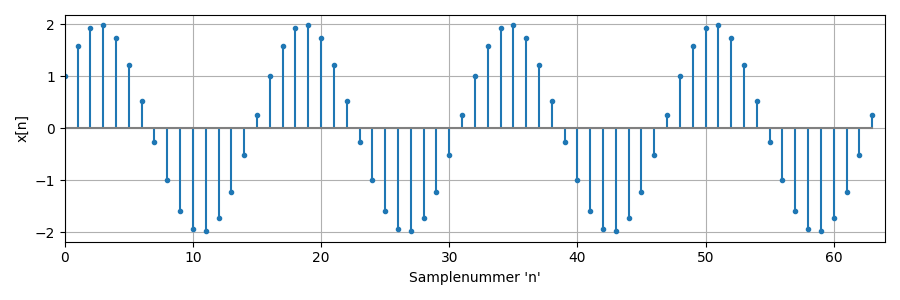

In [35]:
# Parametre for sinusledd(ene)
from math import pi
import matplotlib.pyplot as plt 
import numpy as np

A = 2
N = 64                         # Number of signal samples represented in the frequency domain
Xm = 1j*np.zeros(N)            # "Blank page" DFT with room for N=64 frequency components

# Add frequency component with A=2, phi=-pi/3 and frequency index m=4.
# Match it with a complex conjugate "twin" in index m=N-4.
Xm[4], Xm[N-4] = 2/2*N*np.exp(-1j*pi/3), 2/2*N*np.exp(1j*pi/3)

# Perform Inverse Discrete Fourier Transformation
xn = np.fft.ifft(Xm)



# If the array 'xn' is a purely real signal, create a stem plot of the signal
if(np.sum(np.absolute(np.imag(xn)))>1e-10):
    print("DFT conjugate symmetry not maintained. IDFT produced complex signal.")
else:
    plt.close(1); plt.figure(1, figsize=(9,3))
    plt.stem(np.real(xn), # Real signal values (x[n])
             linefmt='-', # Line style for stem lines
             markerfmt='.', # Marker style set to '.'. Default is 'o' (big dot)
             basefmt='grey', # Adjust color of baseline at x-axis
            )
    plt.xlabel("Samplenummer 'n'")
    plt.ylabel("x[n]")
    plt.xlim([0, N])
    plt.grid(True)
    plt.tight_layout()

In [41]:
from math import pi
from numpy import conjugate
import matplotlib.pyplot as plt 
import numpy as np
omega = 3*pi/16
N = 64

def findKComponents(omega, N):
    KComponent = omega*(N/(2*pi))
    
    print(KComponent)
    
    
    if not ((omega*(N/(2*pi))).is_integer()):
        print(f'Warning, the k-component of {omega = } and {N = } is not a real number.')
    
    return int(KComponent)
    
def applySinComponent(A, omega, N, anglePhi):
    K = findKComponents(omega, N)
    Xm[K], Xm[N-K] = A/2*N*np.exp(-1j*anglePhi), A/2*N*np.exp(1j*anglePhi)
    
    
    
    
def plotDFTContent(title, doConjugate = False):
    
    #Converting to a time-domain array
    if not doConjugate:
        xn = np.fft.ifft(Xm)
    else:
        xn = np.fft.ifft(conjugate(Xm))
        
    
    plt.figure(figsize=(10, 6))
    plt.stem(np.real(xn), linefmt='-', markerfmt='o', basefmt='grey')
    plt.title(title)
    plt.xlabel("Sample number 'n'")
    plt.ylabel("x[n]")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    

6.0


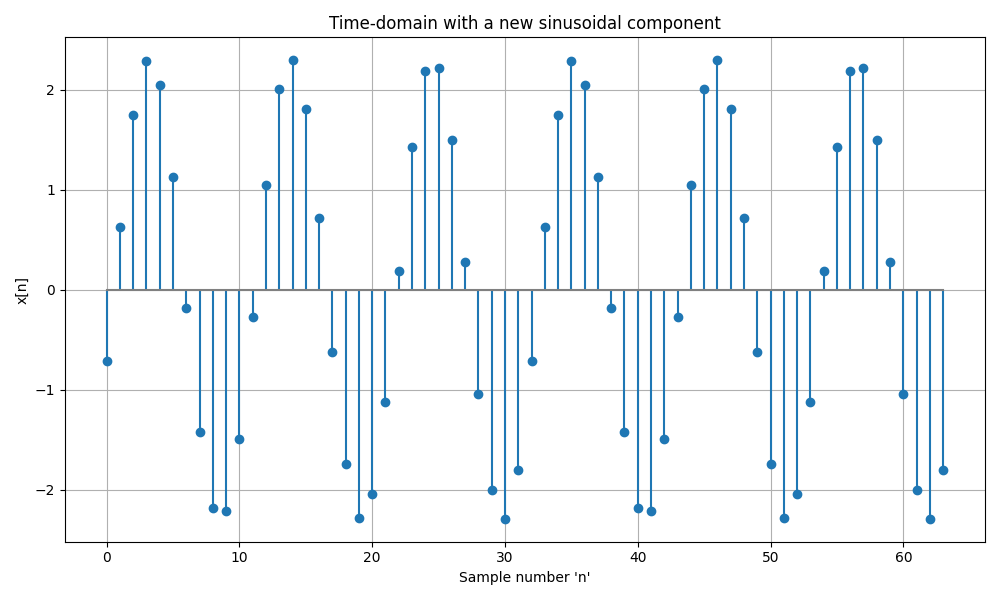

In [42]:
from math import pi
import numpy as np
import matplotlib.pyplot as plt
Xm = 0j + np.zeros(N)


aNew = 2.3
omega = 3*pi/16
nFirstSinusoid = 64
anglePhi = 3*pi/5
N = 64

applySinComponent(A = aNew, omega = omega, N = N, anglePhi = anglePhi)

plotDFTContent('Time-domain with a new sinusoidal component')




9.0


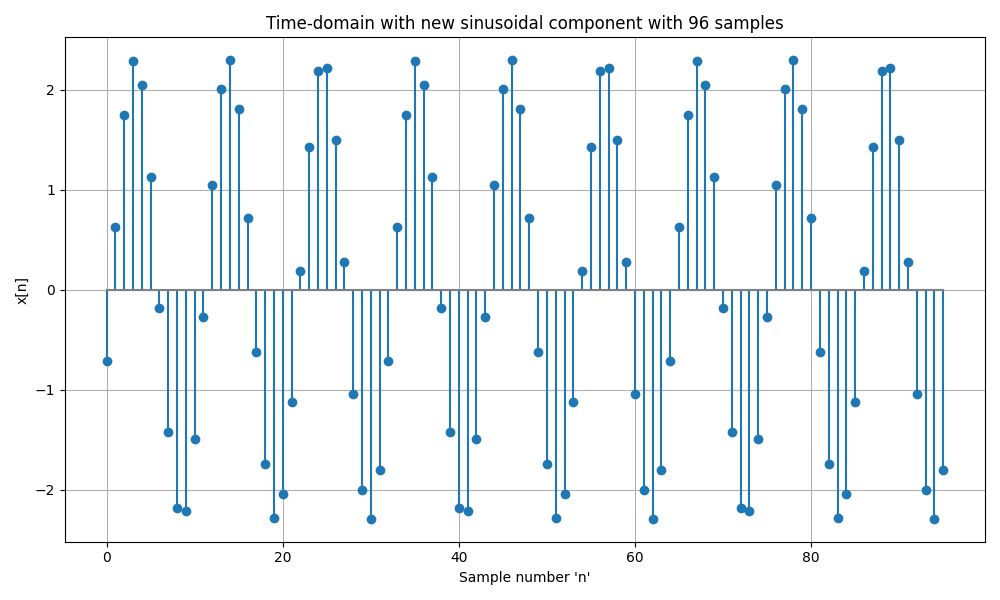

In [43]:
from math import pi
import numpy as np
import matplotlib.pyplot as plt
Xm = 0j + np.zeros(96)


aNew = 2.3
omega = 3*pi/16
anglePhi = 3*pi/5
nFrst = 64


nScnd = 96


applySinComponent(A = aNew, omega = omega, N = nScnd, anglePhi = anglePhi)

plotDFTContent('Time-domain with new sinusoidal component with 96 samples')

6.0
9.0
6.0
6.0


C:\Users\hanur\AppData\Local\Temp\ipykernel_5396\1208091875.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 6))


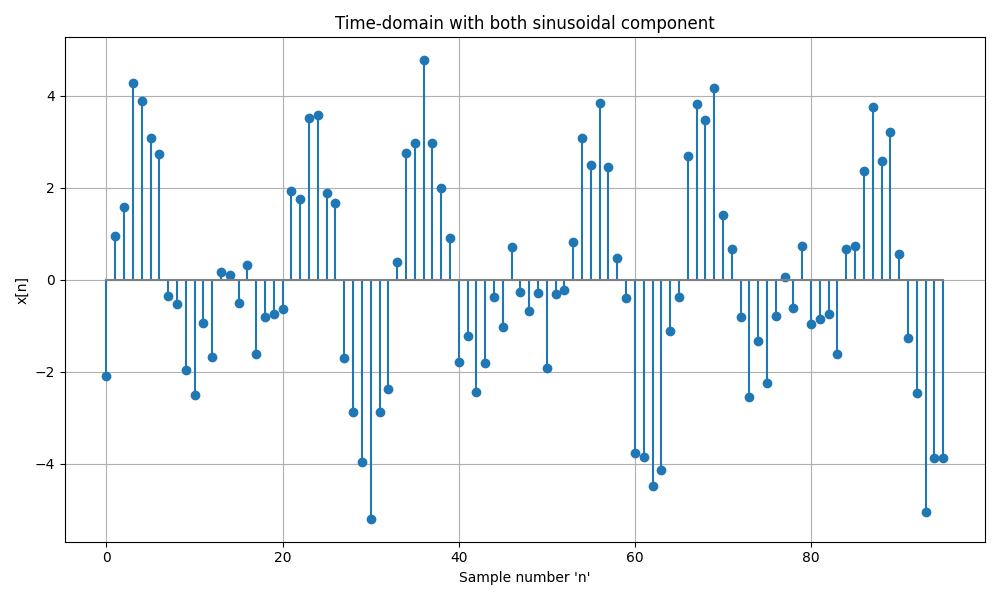

In [57]:
from math import pi
import numpy as np
import matplotlib.pyplot as plt
Xm = 0j + np.zeros(96)


aNew = 2.3
omega1 = 3*pi/16
anglePhi = 3*pi/5


nFrst = 64

nScnd = 96

newAnglePhi1 = 3*pi/6

newAnglePhi2 = 4*pi/6


omega2 = 2*pi/16

applySinComponent(A = aNew, omega = omega1, N = nFrst, anglePhi = anglePhi)

applySinComponent(A = aNew, omega = omega1, N = nScnd, anglePhi = anglePhi)

applySinComponent(A = aNew, omega = omega2, N = nScnd, anglePhi = newAnglePhi1)

applySinComponent(A = aNew, omega = omega2, N = nScnd, anglePhi = newAnglePhi2)

plotDFTContent('Time-domain with both sinusoidal component')

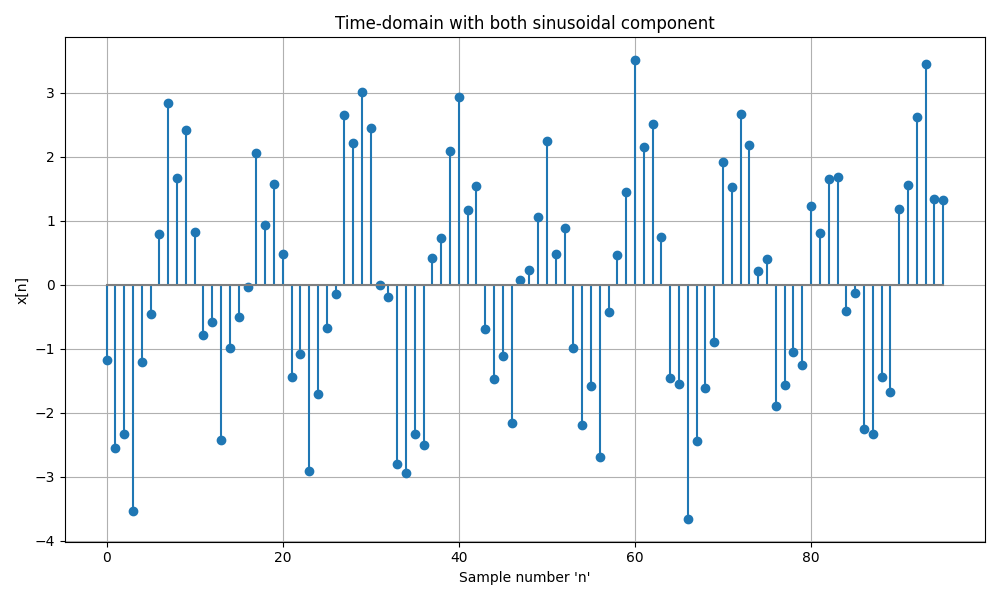

In [45]:
#THIS IS PART C
#The Conjugate
# https://www.geeksforgeeks.org/numpy-conj-in-python/


# https://math.stackexchange.com/questions/3757268/fourier-transform-why-time-reversal-in-freq-domain-is-the-same-as-complex-conju
#time-reversal in the time domain is equivalent to complex conjugation in the frequency domain
#Therefore i should do the complex conjugate of the signal before i do the inverse fast fourier transform


plotDFTContent(title='Time-domain, with both sinusoidal component', doConjugate=1)

Run the code above and study the figures that are generated. It might also be beneficial to do some experimentation by adjusting some of the parameters and observing what happens.


## a) 
* Add a new sinusoidal component with normalized angular frequency $ \hat{\omega} = \frac{3\pi}{16} $, amplitude $ A = 2.3 $, and phase $ \phi = \frac{3\pi}{5} $ by adding a new element to the arrays `k`, `A`, and `phi`.<!--Legg til en ny sinuskomponent med normalisert vinkelfrekvens $\hat{\omega} = \frac{3\pi}{16}$, amplitude $A = 2.3$ og fase $\phi = \frac{3\pi}{5}$ ved å legge til et nytt element arrayene `k`, `A` og `phi`.-->




## b) 
* We want to generate more samples of the same signal. Make additional changes to the variables `k`, `A`, and `phi` as well as `N` to produce 96 samples instead of 64. Ensure that the angular frequencies of the sinusoidal components remain unchanged.

## c)
* Subject the entire signal to time-referseal (e.g. $y[n] = x[-n]$). The connection bewteen time-domain reversal, and it's frequency-domain equivalent is described below:
$$\begin{align}
y[n] &= x[-n] \\
&\Downarrow \\
Y(f) &= X^{*}(f)
\end{align}
$$
  
<!--
* Differentiate the signal in the frequency domain by multiplying $X[m]$ by $j\omega[m]$.
* Subject the entire signal to  $M=-17$ samples of time delay by adjusting the phase of the frequency components. Remember, shifting in the time domain equals complex rotation in frequency domain:

$$\begin{align}
y[n] &= x[n-M]\\
&\Downarrow \\
Y(f) &= X(f) \cdot e^{-j2\pi f\cdot M} 
\end{align}$$-->

*PS: [Here](Figures/task2_sol.png) is what the graph shuld look like after completion of tasks **a)** through **c)***.